<a href="https://colab.research.google.com/github/22sudha/Task-1-data-cleaning-internship/blob/main/Netflix_Elevate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/netflix_titles.csv')
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
#Identify and handle missing values using .isnull() in Python or filters in Excel.
df.isnull().mean()
df.dropna(inplace=True)

#Remove duplicate rows using .drop_duplicates() or Excel’s “Remove Duplicates”.
df.drop_duplicates(inplace=True)

#Standardize text values like gender, country names, etc.
df['country']=df['country'].str.title()
df['listed_in']=df['listed_in'].str.title()

#Convert date formats to a consistent type (e.g., dd-mm-yyyy).
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce', dayfirst=False, yearfirst=False)

#Rename column headers to be clean and uniform (e.g., lowercase, no spaces).
df.columns=[col.strip().lower().replace(' ', '_') for col in df.columns]
#Check and fix data types (e.g., age should be int, date as datetime).
df['release_year']=df['release_year'].astype(int)
df.to_csv('my_cleaned_netflix_data.csv', index=False)  #download

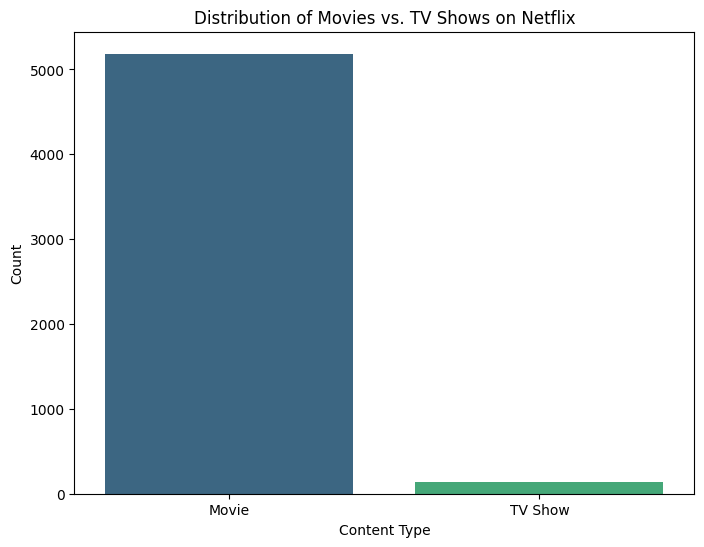

In [ ]:
# Visualize the distribution of content types (movies vs. TV shows)
content_type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, hue=content_type_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2314032300.py:19: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


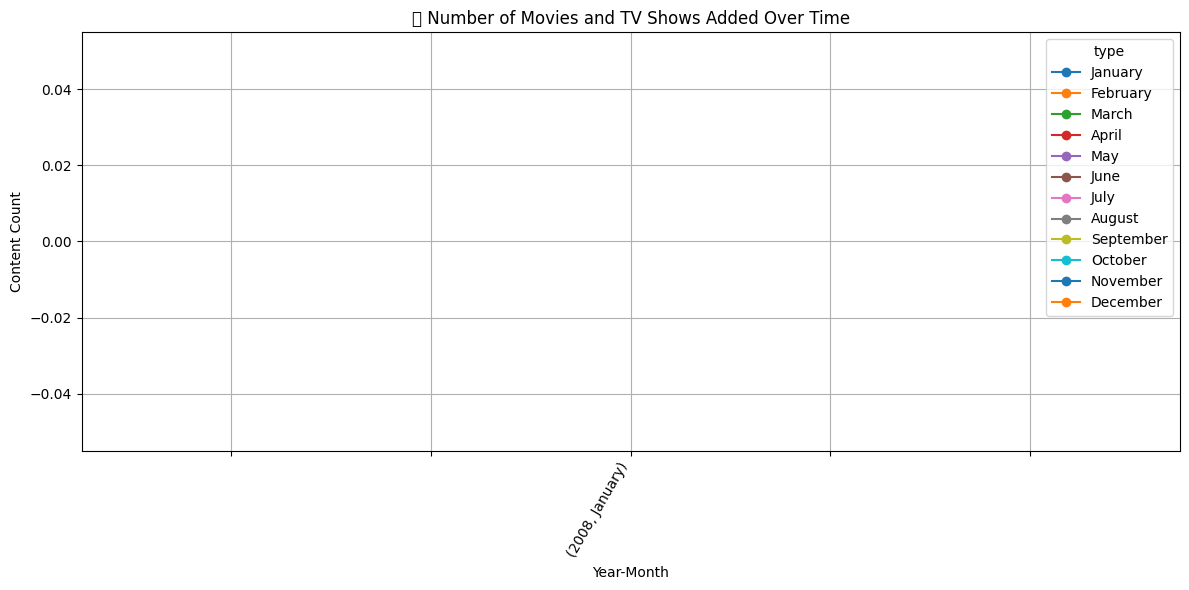

In [ ]:
#Visualize content added over time
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month_name()
content_over_time=df.groupby(['year_added','month_added','type']).size().unstack(fill_value=0)

#Reorder months for plotting
month_order=['January','February','March','April','May', 'June',
               'July','August','September','October','November', 'December']
content_over_time=content_over_time.reindex(month_order,axis=1,level=1)

# Plotting the line chart
content_over_time.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Number of Movies and TV Shows Added Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Content Count')
plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

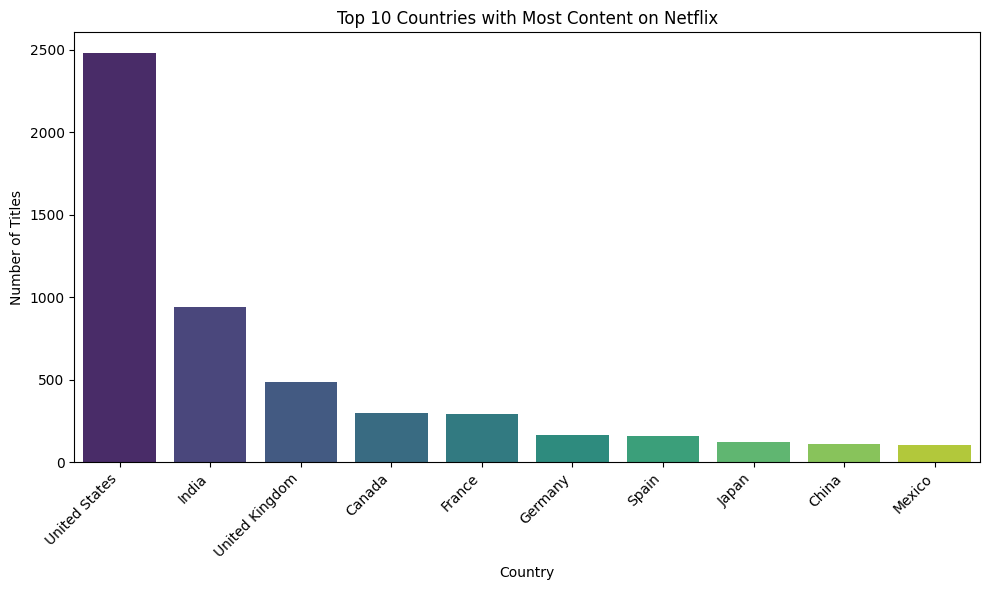

In [ ]:
#Visualize content by country
#split the 'country' column
country_counts=df['country'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values,hue=country_counts.index,palette='viridis',legend=False)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

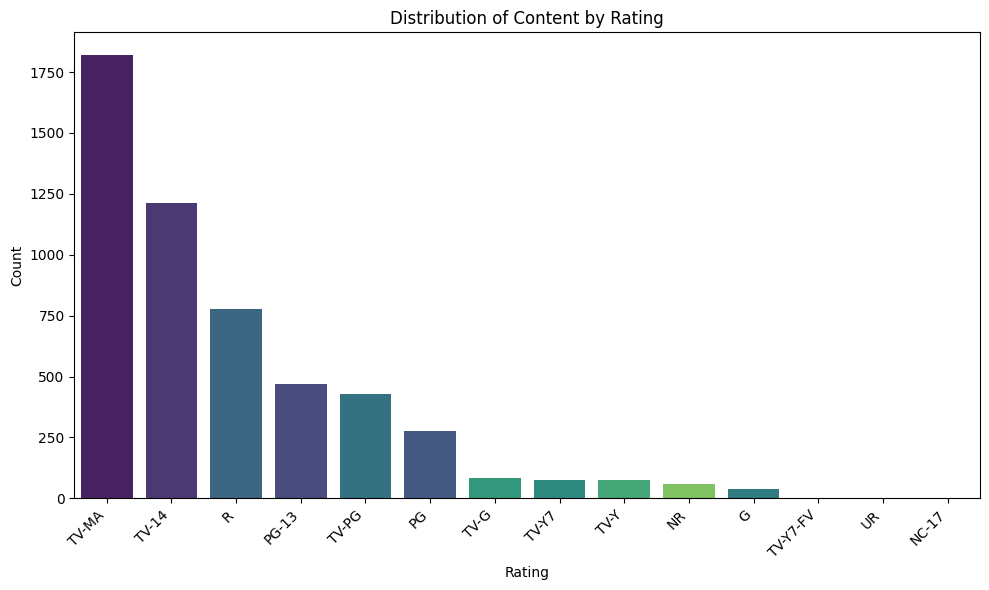

In [ ]:
#Visualize content by rating
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating',order=df['rating'].value_counts().index, hue=df['rating'], palette='viridis', legend=False)
plt.title('Distribution of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

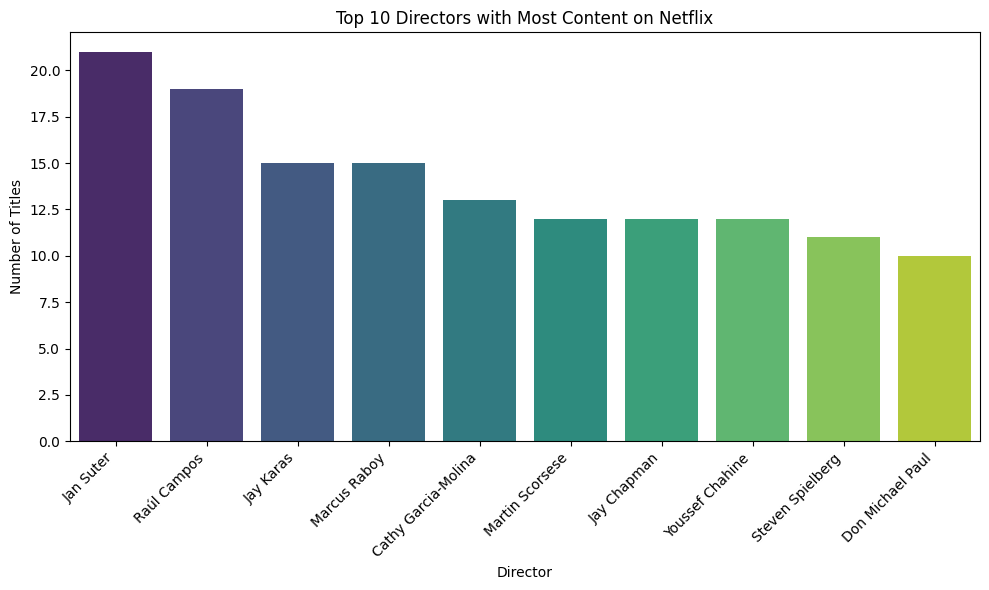

In [ ]:
#split the 'director' column for top directors
director_counts=df['director'].str.split(', ',expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.index, y=director_counts.values, hue=director_counts.index, palette='viridis', legend=False)
plt.title('Top 10 Directors with Most Content on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()